In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
#from skater.util.dataops import show_in_notebook ##??

import warnings
warnings.simplefilter("ignore")

In [82]:
featureNames = ["seq", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "loc"]
yeastData = pd.read_csv("yeast.data", sep=" ", names=featureNames)
kFold = KFold(n_splits=3, shuffle=False)
yeastAttrib = yeastData.iloc[:,1:9].values  # fix column indexes
yeastTarget = yeastData["loc"].values

titles = ("GradientBoost", "KNN", "Gaussian", "Random Forest") # add more
models = (GradientBoostingClassifier(n_estimators=100, max_features=None, max_depth=2, random_state=5),
            KNeighborsClassifier(),
            GaussianNB(),
            RandomForestClassifier())

------------Fold 1
GradientBoost
              precision    recall  f1-score   support

         CYT       0.45      0.62      0.52       198
         ERL       0.00      0.00      0.00         5
         EXC       0.50      0.37      0.42        19
         ME1       0.53      0.59      0.56        17
         ME2       0.45      0.30      0.36        33
         ME3       0.73      0.89      0.80        74
         MIT       0.81      0.42      0.55       180
         NUC       0.50      0.52      0.51       197
         POX       0.29      0.43      0.34        14
         VAC       0.00      0.00      0.00         5

    accuracy                           0.54       742
   macro avg       0.43      0.41      0.41       742
weighted avg       0.57      0.54      0.53       742

Confusion Matrix: 
 [[122   0   0   0   1   5   7  62   0   1]
 [  0   0   2   0   2   0   0   0   0   1]
 [  3   0   7   2   3   0   0   2   1   1]
 [  0   0   1  10   0   1   0   0   4   1]
 [  1   0   2   

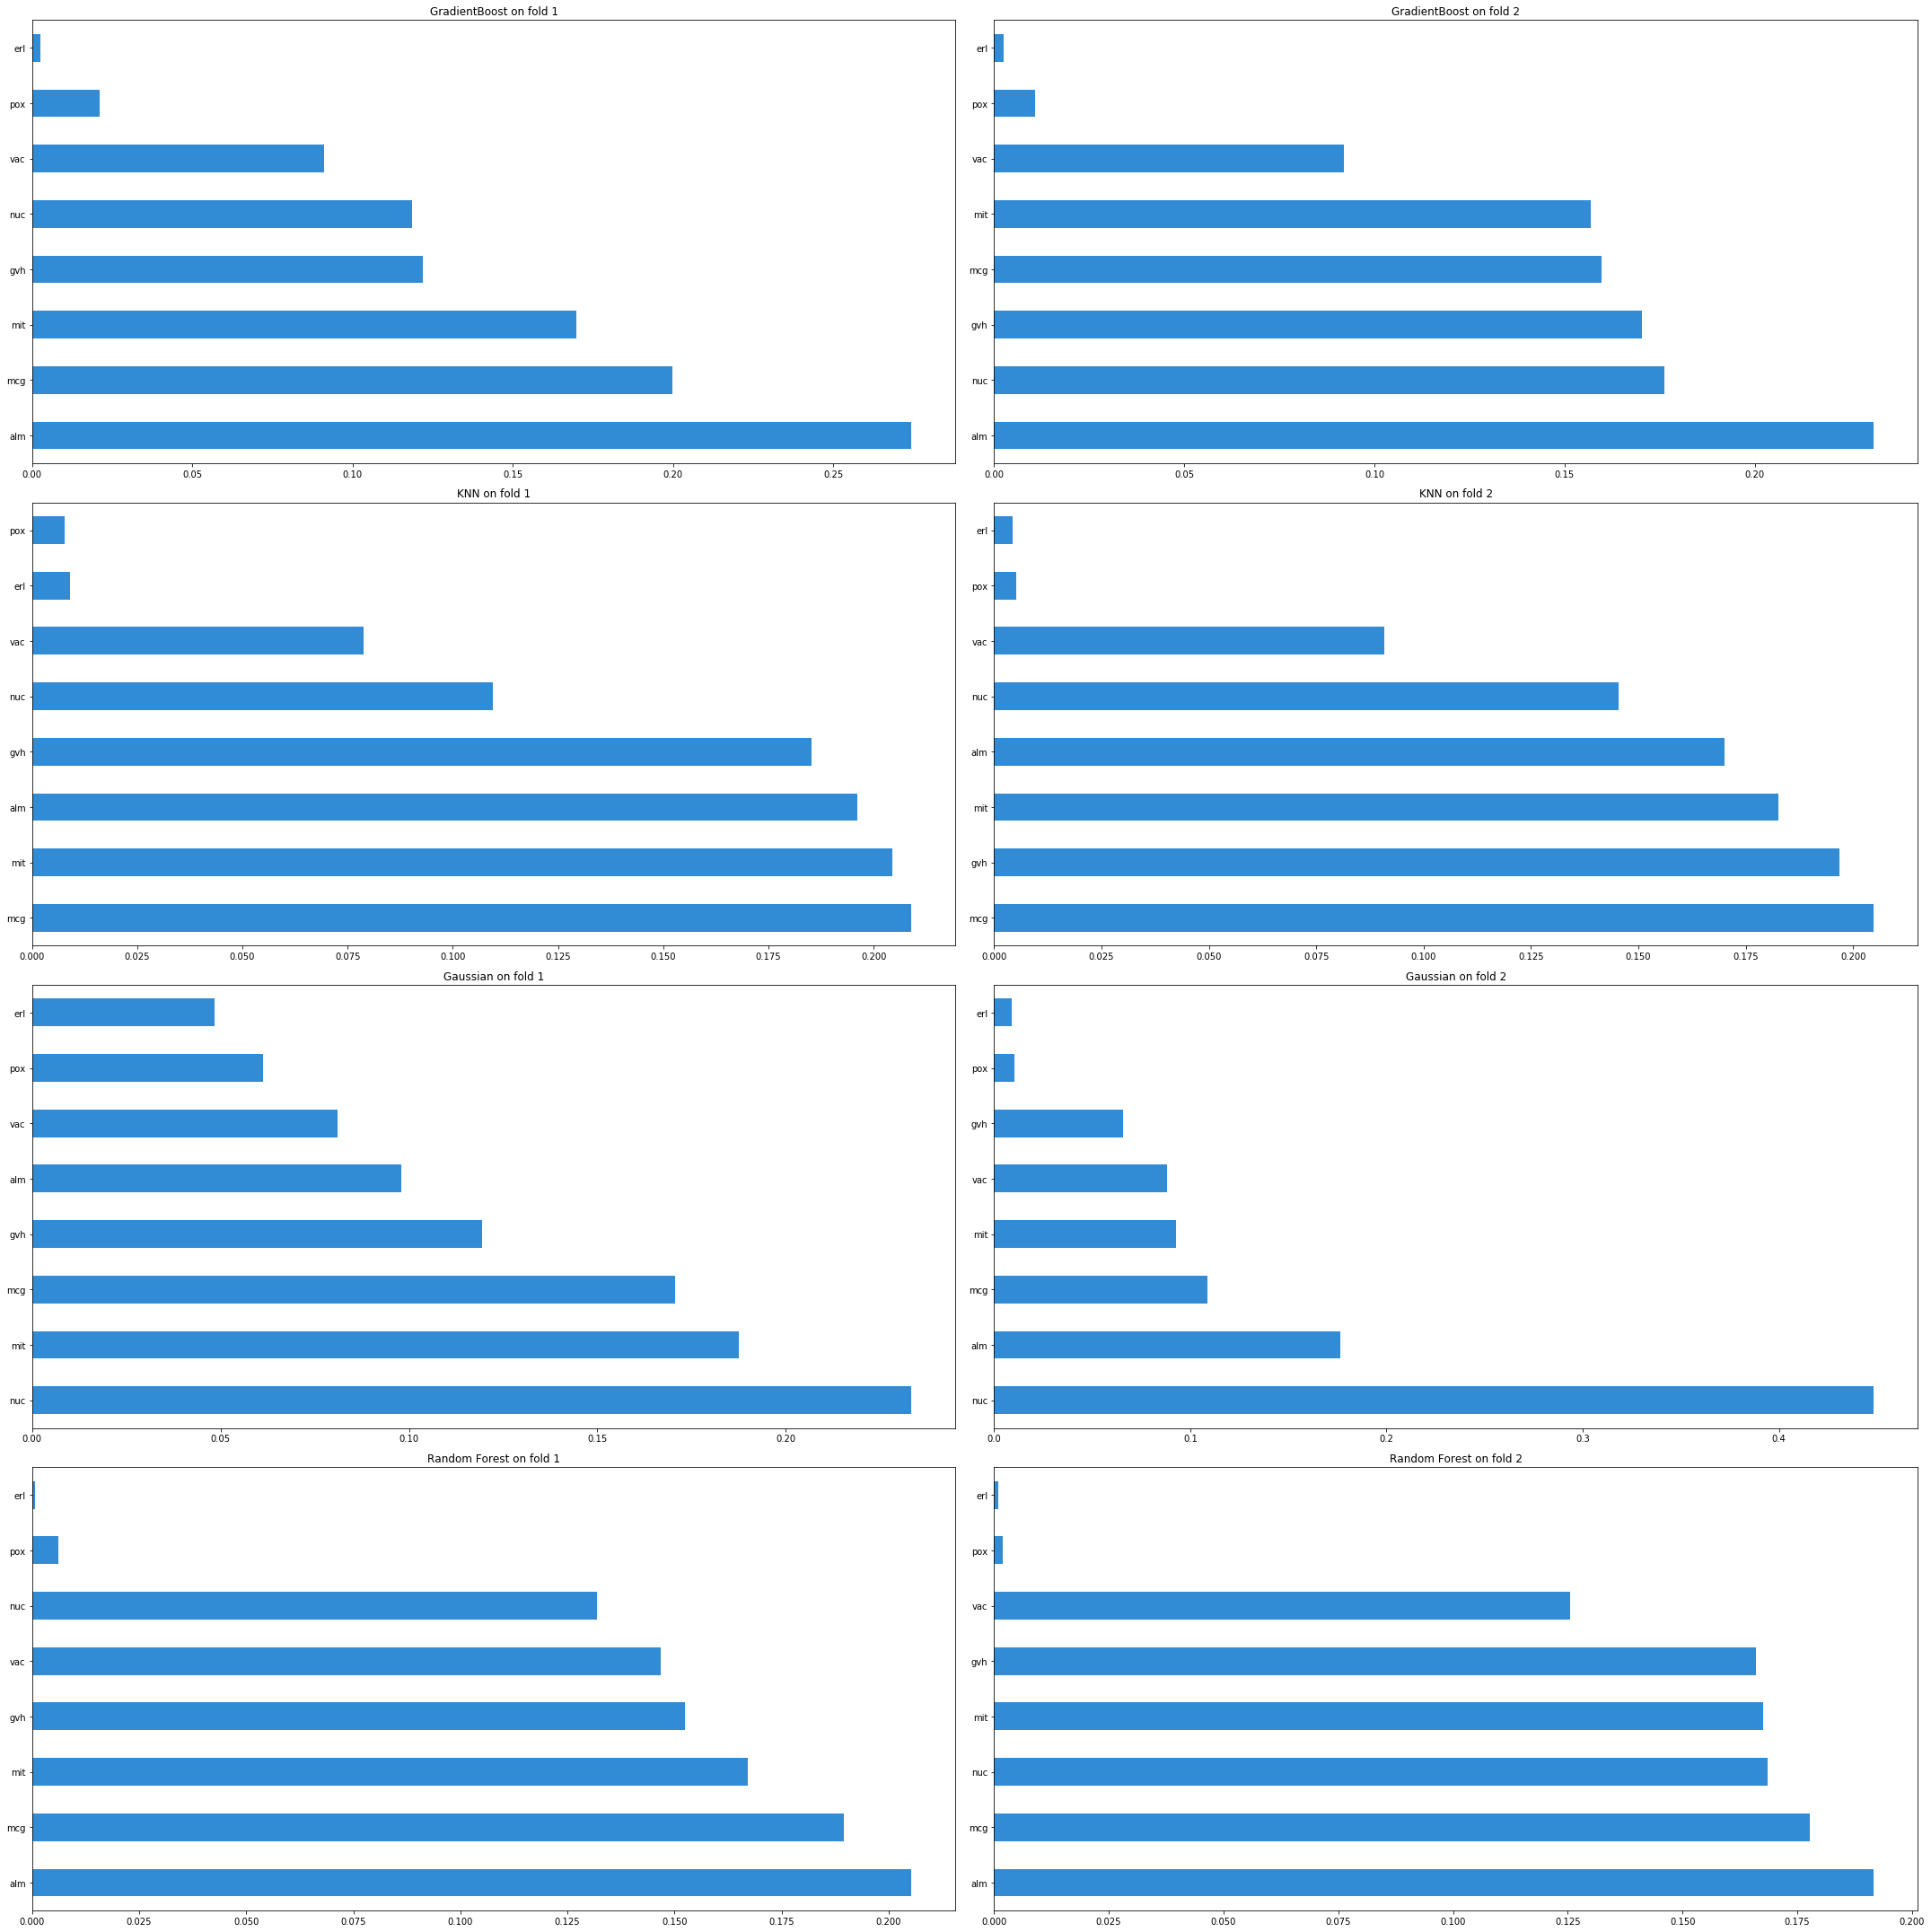

In [30]:
fold = 1
fig, axs = plt.subplots(len(models), kFold.n_splits)
for train_index, test_index in kFold.split(yeastAttrib):
    print(f"------------"
          f"Fold {fold}")
    modelno = 1
    train_data, train_target = yeastAttrib[train_index], yeastTarget[train_index]
    test_data, test_target = yeastAttrib[test_index], yeastTarget[test_index]
    for model, title in zip(models, titles):
        clf = model.fit(train_data, train_target)
        prediction = clf.predict(test_data)
        print(f"{title}")
        print(classification_report(test_target, prediction))
        print(f"Confusion Matrix: \n {confusion_matrix(test_target, prediction)}")

        ax = axs[modelno - 1, fold - 1]
        interpreter = Interpretation(test_data, feature_names=featureNames[1:9])
        # model_no_proba = InMemoryModel(model.predict, examples=test_data, unique_values=model.classes_)
        model_mem = InMemoryModel(model.predict_proba, examples=test_data)
        interpreter.feature_importance.plot_feature_importance(model_mem, ascending=False, ax=ax, progressbar=False)
        ax.set_title(f"{title} on fold {fold}")
        print("\n")
        modelno += 1
    fold += 1
plt.rcParams["figure.figsize"] = (30,30)
plt.tight_layout()

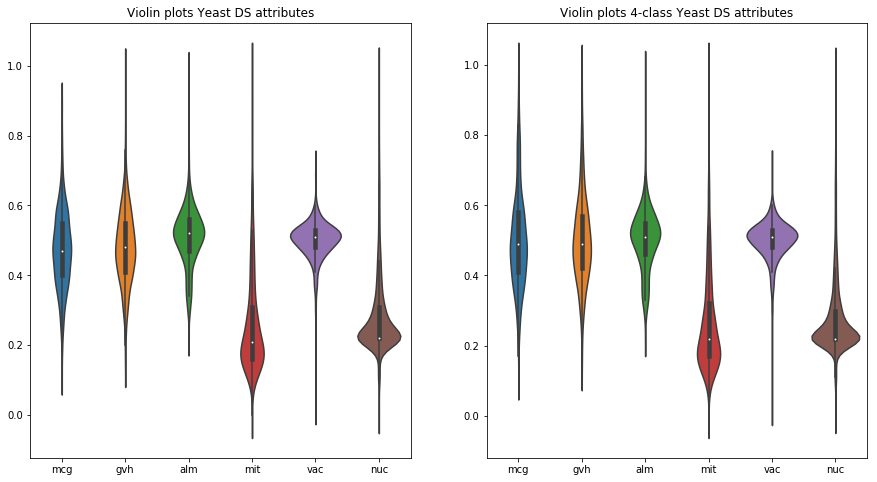

In [31]:
yeast4Classes = yeastData.loc[(yeastData["loc"] == "CYT")|( yeastData["loc"] == "NUC" )| (yeastData["loc"] == "MIT" )| (yeastData["loc"] == "ME3")]
yeastAttrib = yeast4Classes.iloc[:, 1:9].values  # fix column indexes
yeastTarget = yeast4Classes["loc"].values
plt.rcParams["figure.figsize"] = (15,8)
plt.subplot(1,2,1)
plt.title("Violin plots Yeast DS attributes")
ax = sns.violinplot(data=yeast4Classes.iloc[:, [1, 2, 3, 4, 7, 8]], orient="v")
plt.subplot(1, 2, 2)
plt.title("Violin plots 4-class Yeast DS attributes")
ax = sns.violinplot(data=yeastData.iloc[:, [1, 2, 3, 4, 7, 8]], orient="v")

------------Fold 1
GradientBoost
              precision    recall  f1-score   support

         CYT       0.48      0.60      0.53       198
         ME3       0.72      0.88      0.79        75
         MIT       0.82      0.46      0.59       180
         NUC       0.51      0.54      0.53       197

    accuracy                           0.58       650
   macro avg       0.63      0.62      0.61       650
weighted avg       0.61      0.58      0.58       650

Confusion Matrix: 
 [[119   6   8  65]
 [  0  66   1   8]
 [ 58  12  82  28]
 [ 73   8   9 107]]


KNN
              precision    recall  f1-score   support

         CYT       0.42      0.67      0.52       198
         ME3       0.73      0.77      0.75        75
         MIT       0.81      0.42      0.55       180
         NUC       0.55      0.46      0.50       197

    accuracy                           0.55       650
   macro avg       0.63      0.58      0.58       650
weighted avg       0.60      0.55      0.55      

NameError: name 'surrogate_explainer' is not defined

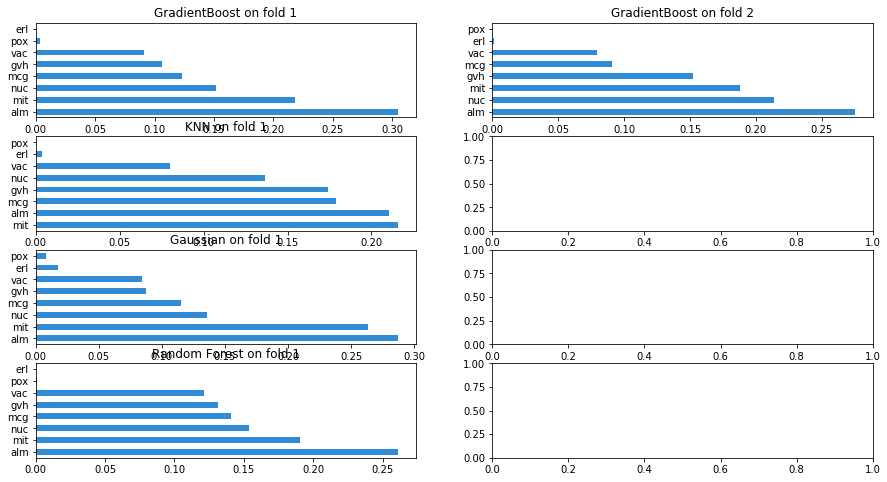

In [32]:
fold = 1
fig, axs = plt.subplots(len(models), kFold.n_splits)
for train_index, test_index in kFold.split(yeastAttrib):
    print(f"------------"
          f"Fold {fold}")
    modelno = 1
    train_data, train_target = yeastAttrib[train_index], yeastTarget[train_index]
    test_data, test_target = yeastAttrib[test_index], yeastTarget[test_index]
    for model, title in zip(models, titles):
        clf = model.fit(train_data, train_target)
        prediction = clf.predict(test_data)
        print(f"{title}")
        print(classification_report(test_target, prediction))
        print(f"Confusion Matrix: \n {confusion_matrix(test_target, prediction)}")

        ax = axs[modelno - 1, fold - 1]
        interpreter = Interpretation(test_data, feature_names=featureNames[1:9])
        # model_no_proba = InMemoryModel(model.predict, examples=test_data, unique_values=model.classes_)
        pyint_model = InMemoryModel(model.predict_proba, examples=test_data,
                                    target_names=["CYT", "ME3", "MIT", "NUC"])
        interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=False, ax=ax,
                                                               progressbar=False)
        ax.set_title(f"{title} on fold {fold}")
        print("\n")
        
        ## To avoid clutter I only produce plots for gradient boosting and one fold only
        if (fold==2 and modelno==1):
            # Plot PDPs of variable "alm" since it is the most important feature, for 3 of the 4 models 
                ## Not for Gaussian Naive bayes tho, explain that
            # for other variables just change the name
            # for other models just change the number
#             interpreter.partial_dependence.plot_partial_dependence(["alm"], pyint_model, grid_resolution=30, with_variance=True)
            # PDP interaction between two variables, for each class
#             interpreter.partial_dependence.plot_partial_dependence([("nuc", "mit")], pyint_model, grid_resolution=10)
#             surrogate_explainer = interpreter.tree_surrogate(feature_names= featureNames[1:9], 
#                                            class_names=["CYT", "ME3", "MIT", "NUC"], seed=5)
#             y_hat_train = model.predict(train_data)
#             y_hat = models['gb'].predict(test_data)

            
            print(f"""Surrogate score: 
                      {surrogate_explainer.learn(train_data, y_hat_train, oracle_y=train_target, cv=True)}""")

            surrogate_explainer.plot_global_decisions(colors=['coral', 'darkkhaki'],
                                                      file_name='simple_tree_class.png', fig_size=(8, 8))
        # couldnt figure how to put it into one subplot, since it plots directly
        modelno += 1
    fold += 1
plt.rcParams["figure.figsize"] = (30,30)
plt.tight_layout()

In [6]:
# Add surrogate (¿our own or Skater's?)

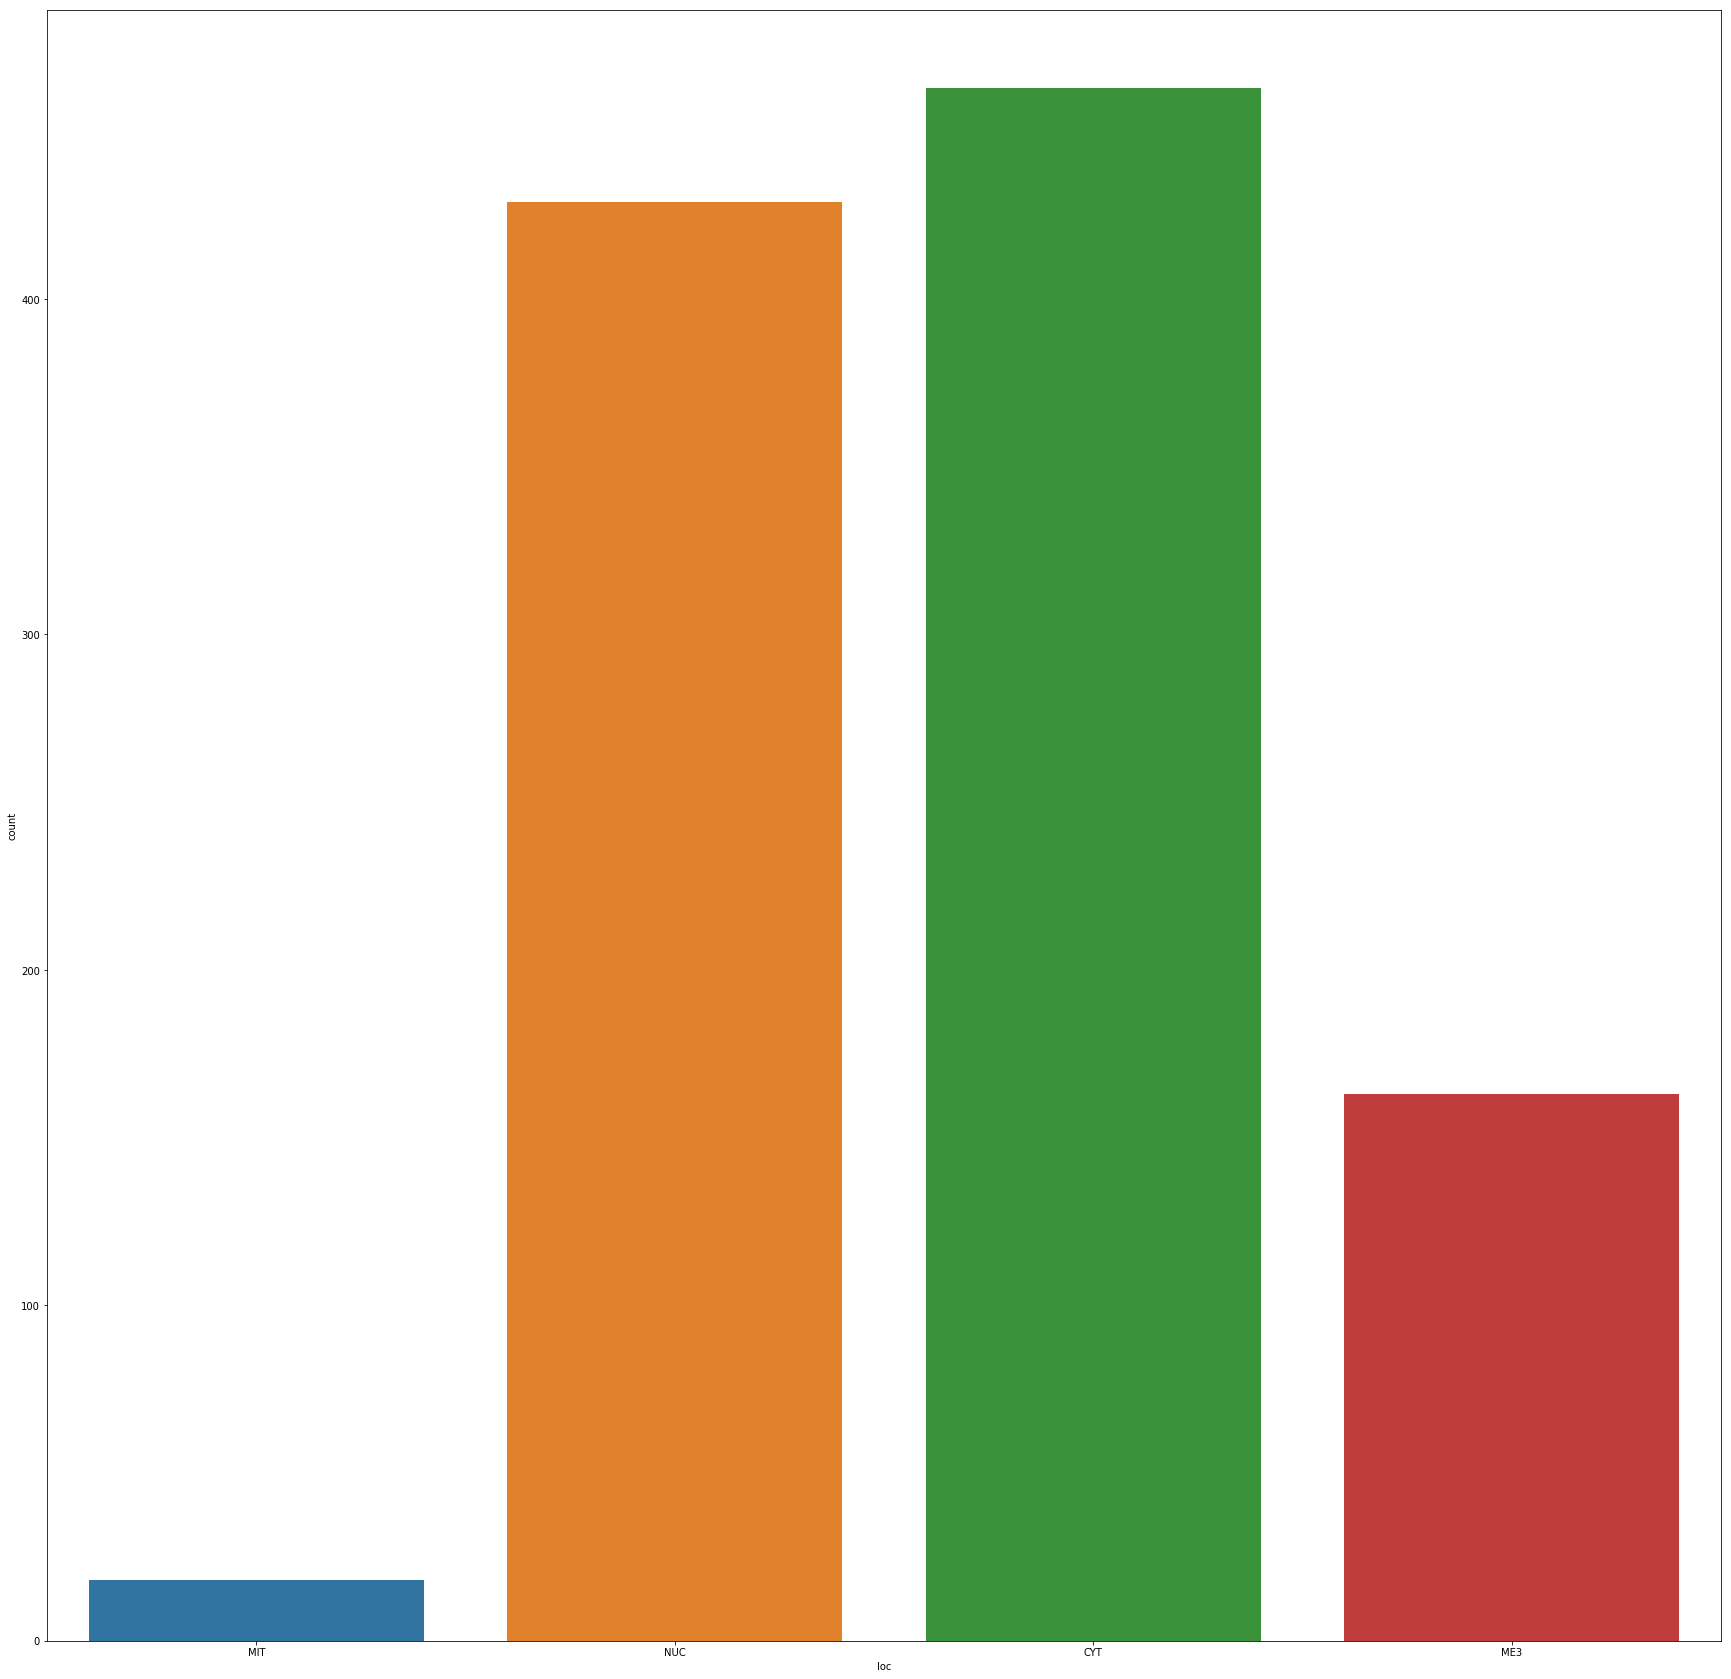

In [87]:

#Remove observations, do the same
yeastDataOCYT = yeast4Classes.drop(yeast4Classes[(yeast4Classes["loc"] == "MIT")].index)
yeastDataCYT = yeast4Classes.drop(yeast4Classes[(yeast4Classes["loc"] != "MIT")].index)
yeast30CYT = yeastDataCYT.loc[0:len(yeastDataCYT) * 0.3]


#yeast4Classes30CYT = yeastDataOCYT.append(yeast30CYT)
yeast4Classes30CYT = pd.concat([yeastDataOCYT, yeast30CYT])

yeast4Classes30CYT = yeast4Classes30CYT.sort_index(ascending=True)
yeast4Classes30CYT.shape
#yeastDataOCYT.shape
ax = sns.countplot(yeast4Classes30CYT["loc"])



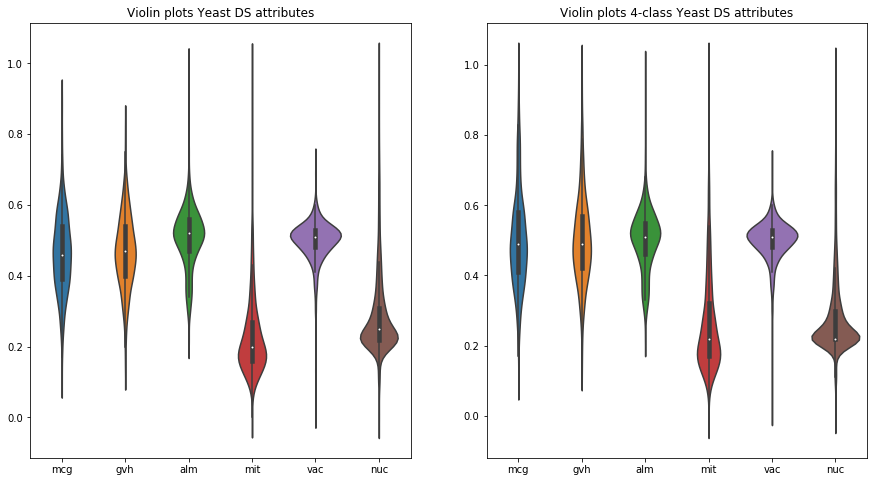

In [89]:
yeastAttrib = yeast4Classes30CYT.iloc[:, 1:9].values  # fix column indexes
yeastTarget = yeast4Classes30CYT["loc"].values
plt.rcParams["figure.figsize"] = (15,8)
plt.subplot(1,2,1)
plt.title("Violin plots Yeast DS attributes")
ax = sns.violinplot(data=yeast4Classes30CYT.iloc[:, [1, 2, 3, 4, 7, 8]], orient="v")
plt.subplot(1, 2, 2)
plt.title("Violin plots 4-class Yeast DS attributes")
ax = sns.violinplot(data=yeastData.iloc[:, [1, 2, 3, 4, 7, 8]], orient="v")

------------Fold 1
GradientBoost
              precision    recall  f1-score   support

         CYT       0.61      0.65      0.63       157
         ME3       0.86      0.92      0.89        61
         MIT       0.00      0.00      0.00        18
         NUC       0.54      0.55      0.54       122

    accuracy                           0.63       358
   macro avg       0.50      0.53      0.51       358
weighted avg       0.60      0.63      0.61       358

Confusion Matrix: 
 [[102   5   0  50]
 [  0  56   0   5]
 [ 14   1   0   3]
 [ 52   3   0  67]]


KNN
              precision    recall  f1-score   support

         CYT       0.55      0.62      0.58       157
         ME3       0.85      0.77      0.81        61
         MIT       0.00      0.00      0.00        18
         NUC       0.47      0.49      0.48       122

    accuracy                           0.57       358
   macro avg       0.47      0.47      0.47       358
weighted avg       0.55      0.57      0.56      

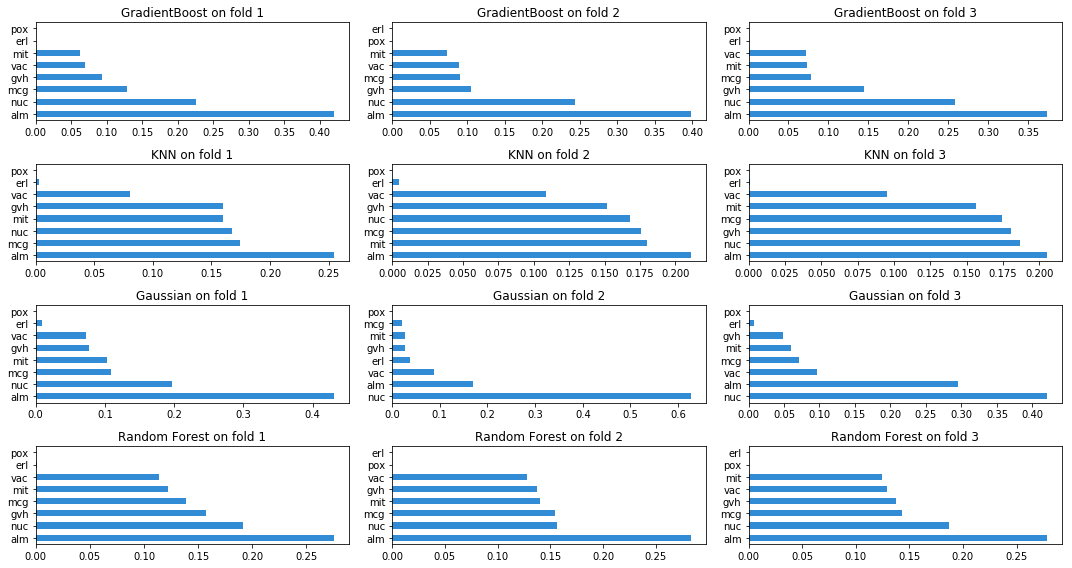

In [90]:
fold = 1
fig, axs = plt.subplots(len(models), kFold.n_splits)
for train_index, test_index in kFold.split(yeastAttrib):
    print(f"------------"
          f"Fold {fold}")
    modelno = 1
    train_data, train_target = yeastAttrib[train_index], yeastTarget[train_index]
    test_data, test_target = yeastAttrib[test_index], yeastTarget[test_index]
    for model, title in zip(models, titles):
        clf = model.fit(train_data, train_target)
        prediction = clf.predict(test_data)
        print(f"{title}")
        print(classification_report(test_target, prediction))
        print(f"Confusion Matrix: \n {confusion_matrix(test_target, prediction)}")

        ax = axs[modelno - 1, fold - 1]
        interpreter = Interpretation(test_data, feature_names=featureNames[1:9])
        # model_no_proba = InMemoryModel(model.predict, examples=test_data, unique_values=model.classes_)
        pyint_model = InMemoryModel(model.predict_proba, examples=test_data,
                                    target_names=["CYT", "ME3", "MIT", "NUC"])
        interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=False, ax=ax,
                                                               progressbar=False)
        ax.set_title(f"{title} on fold {fold}")
        print("\n")
        
        ## To avoid clutter I only produce plots for gradient boosting and one fold only
        #if (fold==2 and modelno==1):
            # Plot PDPs of variable "alm" since it is the most important feature, for 3 of the 4 models 
                ## Not for Gaussian Naive bayes tho, explain that
            # for other variables just change the name
            # for other models just change the number
#             interpreter.partial_dependence.plot_partial_dependence(["alm"], pyint_model, grid_resolution=30, with_variance=True)
            # PDP interaction between two variables, for each class
#             interpreter.partial_dependence.plot_partial_dependence([("nuc", "mit")], pyint_model, grid_resolution=10)
#             surrogate_explainer = interpreter.tree_surrogate(feature_names= featureNames[1:9], 
#                                            class_names=["CYT", "ME3", "MIT", "NUC"], seed=5)
#             y_hat_train = model.predict(train_data)
#             y_hat = models['gb'].predict(test_data)


        # couldnt figure how to put it into one subplot, since it plots directly
        modelno += 1
    fold += 1
plt.rcParams["figure.figsize"] = (30,30)
plt.tight_layout()
